## Kuka Youbot Kinematics

### Import Libraries

In [1]:
import numpy as np
from sympy import*
init_printing()

### Definition of symbolic variables

In [2]:
theta_1 = symbols("theta_1",  real=True)
alpha_1 = symbols("alpha_1",  real=True)
d_1 = symbols("d_1",  real=True)
a_1 = symbols("a_1",  real=True)


In [3]:
def denavit(a, alpha, d, theta):
    # Formulate Denavit Matrix
    A =  Matrix([[cos(theta), -cos(alpha)*sin(theta), sin(alpha)*sin(theta), a*cos(theta)],
                 [sin(theta), cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
                 [0, sin(alpha), cos(alpha), d],
                 [0, 0, 0, 1]])
    return A

In [4]:
## Check Matrices
A = denavit(a_1, alpha_1, d_1, theta_1)

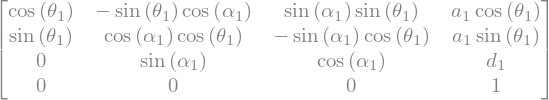

In [5]:
A

### Denavit hartenberg

### base displacement

In [6]:
a_0 = symbols("a_0", real = True)
d_0 = 0.0
alpha_0 = 0.0
theta_0 = 0.0
A_0 = denavit(a_0, alpha_0, d_0, theta_0)

### Joint 1

In [7]:
a_1 = symbols("a_1",  real=True)
d_1 = symbols("d_1",  real=True)
alpha_1 = pi/2
theta_1 = symbols("theta_1",  real=True)

In [8]:
A_1 = denavit(a_1, alpha_1, d_1, theta_1)

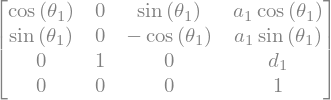

In [9]:
A_1

### Joint 2

In [10]:
a_2 = symbols("a_2",  real=True)
d_2 = 0
alpha_2 = 0
theta_2 = symbols("theta_2",  real=True)
theta_2 = theta_2

In [11]:
A_2 = denavit(a_2, alpha_2, d_2, theta_2 + pi/2)

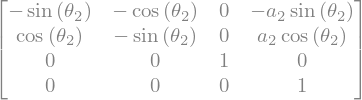

In [12]:
A_2

### Joint 3

In [13]:
a_3 = symbols("a_3",  real=True)
d_3 = 0
alpha_3 = 0
theta_3 = symbols("theta_3",  real=True)

In [14]:
A_3 = denavit(a_3, alpha_3, d_3, theta_3)

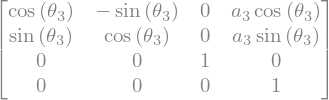

In [15]:
A_3

### Joint 4

In [16]:
a_4 = symbols("a_4",  real=True)
d_4 = 0.0
alpha_4 = 0.0
theta_4 = symbols("theta_4",  real=True)

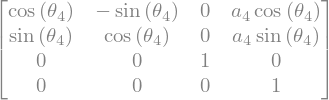

In [17]:
A_4 = denavit(a_4, alpha_4, d_4, theta_4)
A_4

### Joint 5

In [18]:
a_5_1 = 0
d_5_1 = 0
alpha_5_1 = -pi/2
theta_5_1 = -pi/2

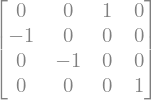

In [19]:
A_5_1 = denavit(a_5_1, alpha_5_1, d_5_1, theta_5_1)
A_5_1

### Joint 5

In [20]:
a_5 = 0
d_5 = symbols("d_5",  real=True)
alpha_5 = 0
theta_5 = symbols("theta_5",  real=True)

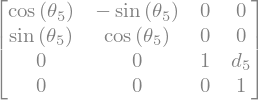

In [21]:
A_5 = denavit(a_5, alpha_5, d_5, theta_5)
A_5

### Forward Kinematics

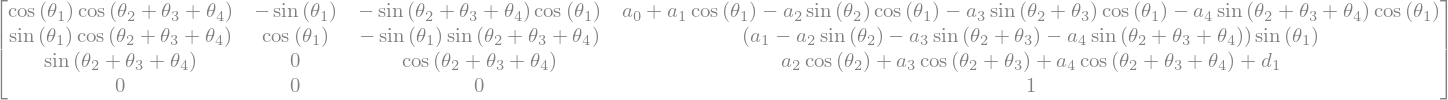

In [22]:
T = simplify(A_0@A_1@A_2@A_3@A_4@A_5_1)
T

In [27]:
P = T[0:3, 3]
Px = T[0, 3]
print_latex(Px)

a_{0} + a_{1} \cos{\left(\theta_{1} \right)} - a_{2} \sin{\left(\theta_{2} \right)} \cos{\left(\theta_{1} \right)} - a_{3} \sin{\left(\theta_{2} + \theta_{3} \right)} \cos{\left(\theta_{1} \right)} - a_{4} \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} \cos{\left(\theta_{1} \right)}


In [24]:
dp = P.jacobian([theta_1, theta_2, theta_3, theta_4])

In [50]:
dp[2,3]